# Analysis of Loan Data from Prosper
## by Anderson Abi-A Shoh Chama

## Investigation Overview

> In this project, I will explore Loan dataset from Prosper, which contains 113,937 rows and 81 columns. I will pick some of the variables that are related to Default to analyze.
Firstly, some data wrangling and cleaning, and then on to EDA with different types of charts to explore relationships between/among variables, and hopefully get significant results from my research.

## Dataset Overview

> The dataset of Prosper Loan contains 113,937 rows and 81 columns. Most variables are numeric, some are categorical, boolean and date. Variables like ProsperRating (Alpha) and IncomeRange can be ordered factor variables with the following levels.
Some of the variables have a lot of null values, such as variables prosperrating and prosperscore, which I'll need to deal with.

In [1]:
# import all packages and set plots to be embedded inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import nbconvert
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("prosperLoanData.csv")

In [3]:
# Cleaning
loan_clean = loan.copy()
loan_clean.columns = map(str.lower, loan_clean.columns)
loan_clean.columns = loan_clean.columns.str.replace(' ', '_')
# Remove columns I absolutely don't need for my analysis.
loan_clean.drop(columns = ['listingkey', 'listingnumber', 'groupkey', 'loankey', 'loannumber', 'memberkey', 'closeddate'], inplace = True)
# Deal with categorical variables' null values.
categorical_columns = loan_clean.select_dtypes(include = 'object').columns
loan_clean[categorical_columns] = loan_clean[categorical_columns].fillna('unknown')
loan_clean.drop(columns = ['borrowerapr','estimatedeffectiveyield', 'estimatedloss', 'estimatedreturn', \
                           'prosperrating_(numeric)', 'prosperscore'], inplace = True)
loan_clean.dropna(subset = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper', \
                            'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies', \
                            'amountdelinquent', 'delinquencieslast7years'], inplace = True)
loan_clean['debttoincomeratio'].fillna(loan_clean['monthlyloanpayment'] / loan_clean['statedmonthlyincome'], inplace = True)
loan_clean['debttoincomeratio'].replace(np.inf, np.nan, inplace = True)
loan_clean['debttoincomeratio'].fillna(loan_clean['monthlyloanpayment'] / (loan_clean['statedmonthlyincome'] + 1), inplace = True)
columns = ['totalprosperloans', 'totalprosperpaymentsbilled', 'ontimeprosperpayments', 'prosperpaymentslessthanonemonthlate',\
            'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed', 'prosperprincipaloutstanding']
for col in columns:
    loan_clean[col].fillna(0, inplace = True)
loan_clean.drop(columns = ['scorexchangeattimeoflisting', 'loanfirstdefaultedcyclenumber', 'lp_customerpayments',\
                          'lp_customerprincipalpayments', 'lp_interestandfees', 'lp_servicefees', 'lp_collectionfees',\
                          'lp_grossprincipalloss', 'lp_netprincipalloss', 'lp_nonprincipalrecoverypayments'], inplace = True)

In [4]:
loan_ana = loan_clean[loan_clean['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', \
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]
loan_ana['default'] = np.where(loan_ana['loanstatus'] == 'Completed', 0, 1)

## Default Loans Percentage


> I created a new variable **Default** based on the loanstatus variable. Here, 1 represents the defaulted loan and 0 represents completed loan.

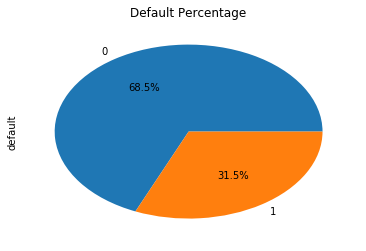

In [5]:
loan_ana['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('Default Percentage');

## Borrower Rate by Default

> Borrower rate is the borrower's interest rate for this loan. From the plot, borrower rates are more likely to be highly with default loans.

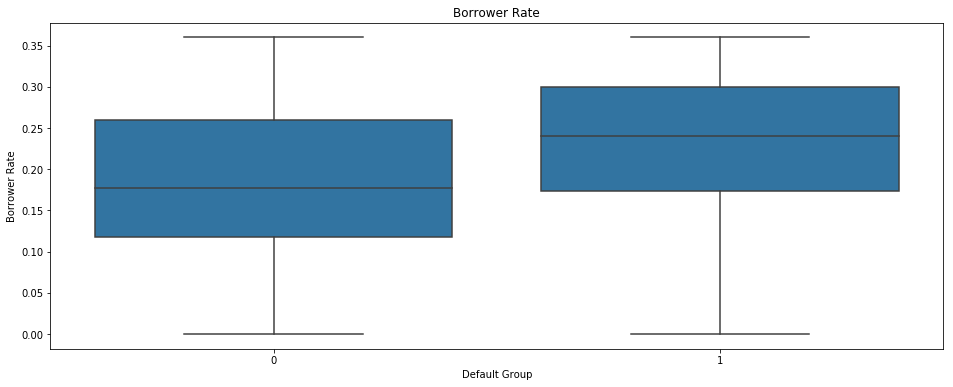

In [13]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (16, 6))
sb.boxplot(data = loan_ana, x = 'default', y = 'borrowerrate', color = base_color);
plt.xlabel('Default Group');
plt.ylabel('Borrower Rate');
plt.title('Borrower Rate');

## Default Rate by Income Group

>The highest default rates come from *Not Employed group* and *\\$0* group. Also, we also note that the *Not display* group's average default rate is lower than \\$0 - \\$49,999.

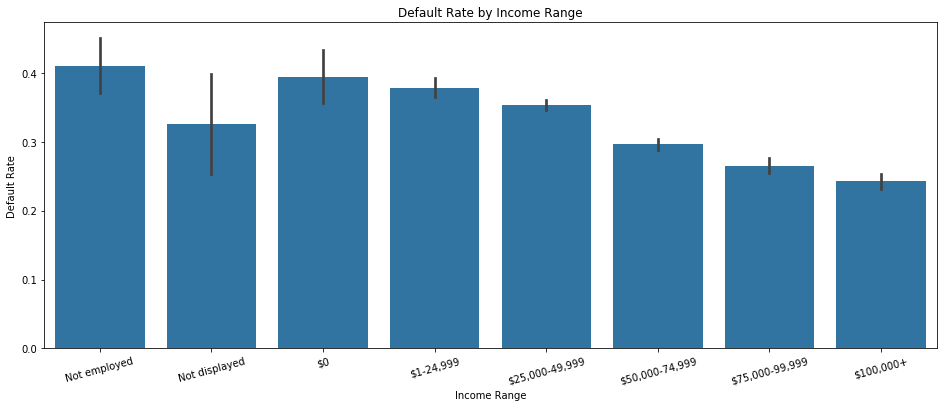

In [14]:
income_classes = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
loan_ana['incomerange'] = pd.Categorical(loan_ana['incomerange'], categories = income_classes, ordered = True)
plt.figure(figsize = (16, 6))
sb.barplot(data = loan_ana, x = 'incomerange', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('Income Range');
plt.ylabel('Default Rate');
plt.title('Default Rate by Income Range');

## Credit Score Range Lower by Default Rate
> The is a strong negative correlation between credit score lower range and default rate. However, there is an anomally at creditscorerangelower = 860

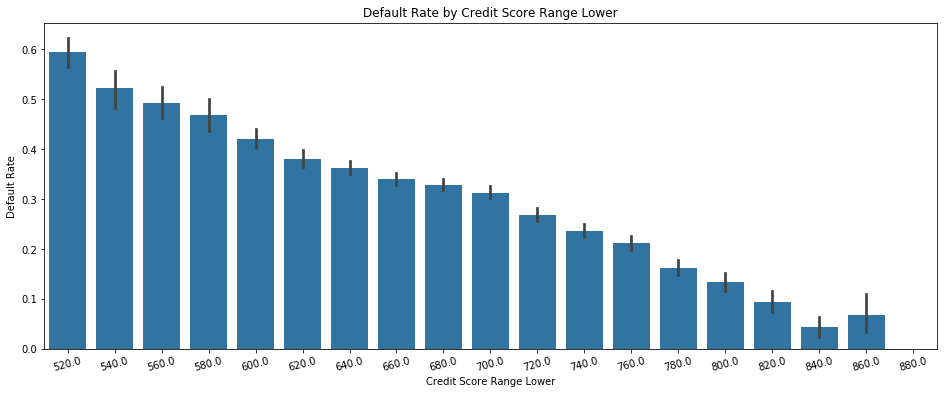

In [15]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = loan_ana, x = 'creditscorerangelower', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('Credit Score Range Lower');
plt.ylabel('Default Rate');
plt.title('Default Rate by Credit Score Range Lower');

## Borrower Rate by Credit Score Range Lower & Default Rate
> For each credit score, the borrower rate for the default group are more likely to be higher.

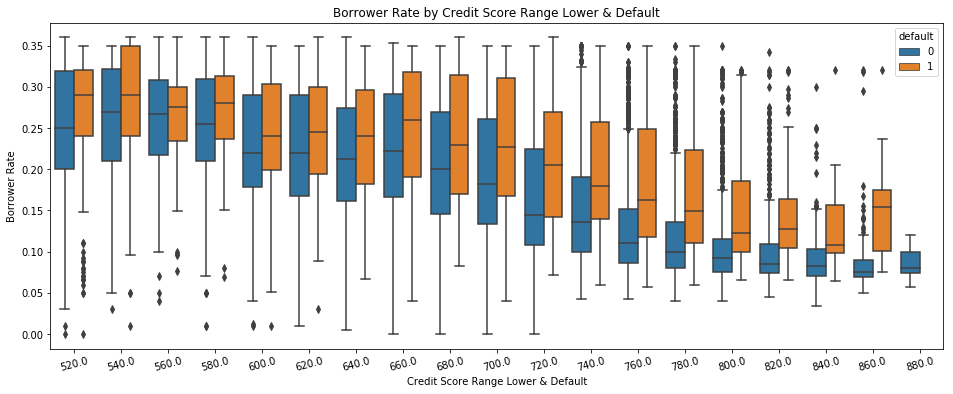

In [17]:
plt.figure(figsize = (16, 6))
sb.boxplot(data = loan_ana, x = 'creditscorerangelower', y = 'borrowerrate', hue = 'default');
plt.xticks(rotation = 15);
plt.xlabel('Credit Score Range Lower & Default');
plt.ylabel('Borrower Rate');
plt.title('Borrower Rate by Credit Score Range Lower & Default');

# Thank you!!

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt